In [0]:
import matplotlib.pyplot as plt
from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.layers import Dense, Activation
import seaborn as sns
import numpy as np
import keras


%matplotlib inline


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print("Training data shape: ", X_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", X_test.shape)

print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9]


In [0]:
# Flatten the images
image_vector_size = 28*28
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

In [5]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Model 1 without dropout and BN

In [0]:

output_dim = 10
input_dim = X_train.shape[1]

nb_epoch = 10
batch_size = 128

In [0]:
model1 = Sequential()

model1.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model1.add(Dense(120, activation='relu', kernel_initializer='random_uniform'))

model1.add(Dense(output_dim, activation='softmax'))

print(model1.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_16 (Dense)             (None, 120)               43800     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1210      
Total params: 330,750
Trainable params: 330,750
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model1.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [0]:
# Training the model
history = model1.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 30, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [0]:
score = model1.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 49us/step


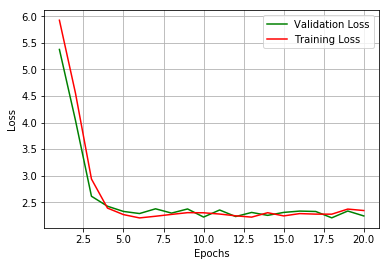

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [0]:
print('Test accuracy:', score[1])


Test accuracy: 0.8604


### 2 Layers with BN and Dropout

In [0]:
model2 = Sequential()

model2.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model2.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))

model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(output_dim, activation='softmax'))

print(model2.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               46720     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 334,262
Trainable params: 334,006
Non-trainable params: 256
_________________________________________________________________
None


In [0]:
model2.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [0]:
# Training the model
history = model2.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 30, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [0]:
score = model2.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 55us/step


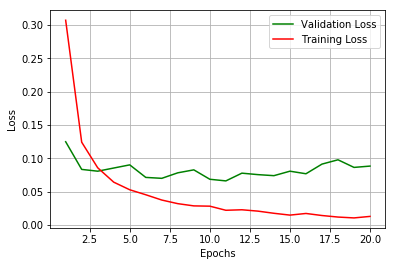

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [0]:
print('Test accuracy:', score[1])


Test accuracy: 0.9819


### Changing dropout rate to 0.8

In [16]:
model2 = Sequential()

model2.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model2.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))

model2.add(BatchNormalization())
model2.add(Dropout(0.8))

model2.add(Dense(output_dim, activation='softmax'))

print(model2.summary())



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 364)               285740    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               46720     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 334,262
Trainable params: 334,006
Non-trainable params: 256
_________________________________________________________________
None


In [0]:
model2.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [19]:
# Training the model
history = model2.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.1610 - acc: 0.9561 - val_loss: 0.1074 - val_acc: 0.9673
Epoch 2/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.1238 - acc: 0.9661 - val_loss: 0.0930 - val_acc: 0.9745
Epoch 3/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.1043 - acc: 0.9710 - val_loss: 0.0836 - val_acc: 0.9748
Epoch 4/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0880 - acc: 0.9758 - val_loss: 0.0896 - val_acc: 0.9748
Epoch 5/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0741 - acc: 0.9792 - val_loss: 0.0880 - val_acc: 0.9743
Epoch 6/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0638 - acc: 0.9816 - val_loss: 0.0733 - val_acc: 0.9808
Epoch 7/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0622 - acc: 0.9829 - val_loss: 0.0842 - val_acc

In [20]:
score = model2.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 50us/step


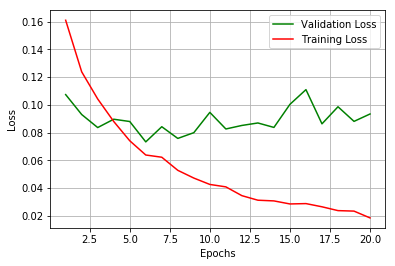

In [21]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [22]:
print('Test accuracy:', score[1])


Test accuracy: 0.9803


### Changing dropout rate to 0.2

In [30]:
model2 = Sequential()

model2.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model2.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))

model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(output_dim, activation='softmax'))

print(model2.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 364)               285740    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               46720     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 334,262
Trainable params: 334,006
Non-trainable params: 256
_________________________________________________________________
None


In [0]:
model2.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [32]:
# Training the model
history = model2.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.2233 - acc: 0.9340 - val_loss: 0.1149 - val_acc: 0.9643
Epoch 2/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0950 - acc: 0.9714 - val_loss: 0.0874 - val_acc: 0.9731
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0646 - acc: 0.9803 - val_loss: 0.0940 - val_acc: 0.9713
Epoch 4/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0496 - acc: 0.9841 - val_loss: 0.0780 - val_acc: 0.9759
Epoch 5/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0382 - acc: 0.9874 - val_loss: 0.0642 - val_acc: 0.9815
Epoch 6/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0315 - acc: 0.9902 - val_loss: 0.0838 - val_acc: 0.9747
Epoch 7/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0269 - acc: 0.9912 - val_loss: 0.0745 - val_ac

In [33]:
score = model2.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 48us/step


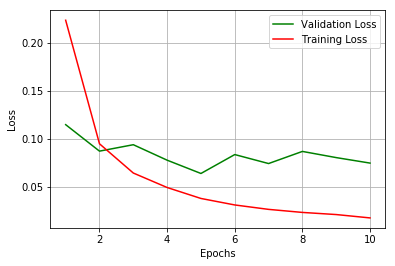

In [34]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [35]:
print('Test accuracy:', score[1])


Test accuracy: 0.9813


### Model with 3 hidden layers

In [0]:
model3 = Sequential()

model3.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model3.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model3.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))

#model2.add(BatchNormalization())
#model2.add(Dropout(0.5))

model3.add(Dense(output_dim, activation='softmax'))

print(model3.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_29 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                650       
Total params: 341,366
Trainable params: 341,366
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model3.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [0]:
# Training the model
history = model3.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 30, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [0]:
score = model3.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 53us/step


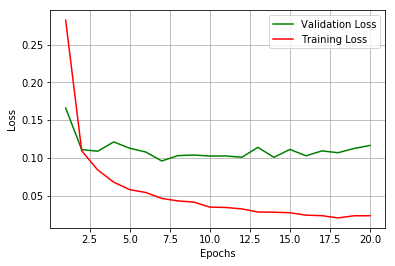

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [0]:
print('Test accuracy:', score[1])


Test accuracy: 0.9774


### Model with 3 hidden layers along with BN and dropout

In [0]:
model4 = Sequential()

model4.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model4.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model4.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))

model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(output_dim, activation='softmax'))

print(model4.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_33 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_34 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                650       
Total params: 341,622
Trainable params: 341,494
Non-trainable params: 128
_________________________________________________________________
No

In [0]:
model4.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [0]:
# Training the model
history = model4.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 30, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [0]:
score = model4.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 58us/step


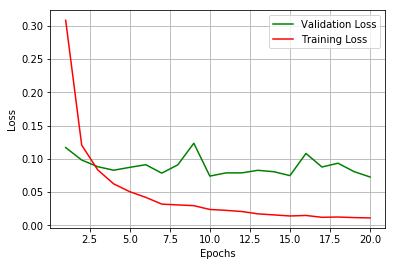

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [0]:
print('Test accuracy:', score[1])


Test accuracy: 0.9837


### changing dropout rate to 0.8

In [36]:
model4 = Sequential()

model4.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model4.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model4.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))

model4.add(BatchNormalization())
model4.add(Dropout(0.8))

model4.add(Dense(output_dim, activation='softmax'))

print(model4.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 341,622
Trainable params: 341,494
Non-trainable params: 128
_________________________________________________________________
No

In [0]:
model4.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [38]:
# Training the model
history = model4.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.7021 - acc: 0.7874 - val_loss: 0.5703 - val_acc: 0.9000
Epoch 2/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.2923 - acc: 0.9194 - val_loss: 0.1403 - val_acc: 0.9595
Epoch 3/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.1997 - acc: 0.9452 - val_loss: 0.1222 - val_acc: 0.9656
Epoch 4/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.1612 - acc: 0.9552 - val_loss: 0.1013 - val_acc: 0.9737
Epoch 5/10
60000/60000 [==============================] - 5s 92us/step - loss: 0.1353 - acc: 0.9605 - val_loss: 0.0981 - val_acc: 0.9736
Epoch 6/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.1188 - acc: 0.9655 - val_loss: 0.0997 - val_acc: 0.9751
Epoch 7/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.1013 - acc: 0.9692 - val_loss: 0.0942 - val_ac

In [39]:
score = model4.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 51us/step


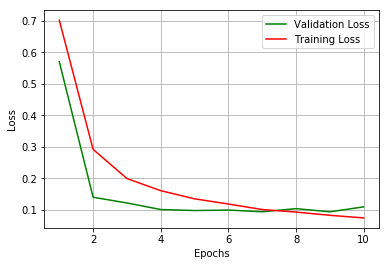

In [40]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [41]:
print('Test accuracy:', score[1])


Test accuracy: 0.9767


### changing dropout rate to 0.2

In [42]:
model4 = Sequential()

model4.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model4.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model4.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))

model4.add(BatchNormalization())
model4.add(Dropout(0.2))

model4.add(Dense(output_dim, activation='softmax'))

print(model4.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                650       
Total params: 341,622
Trainable params: 341,494
Non-trainable params: 128
_________________________________________________________________
No

In [0]:
model4.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [44]:
# Training the model
history = model4.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2361 - acc: 0.9319 - val_loss: 0.1084 - val_acc: 0.9648
Epoch 2/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0951 - acc: 0.9717 - val_loss: 0.1040 - val_acc: 0.9687
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0647 - acc: 0.9810 - val_loss: 0.0983 - val_acc: 0.9693
Epoch 4/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0511 - acc: 0.9843 - val_loss: 0.0790 - val_acc: 0.9742
Epoch 5/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0386 - acc: 0.9879 - val_loss: 0.0710 - val_acc: 0.9785
Epoch 6/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0332 - acc: 0.9896 - val_loss: 0.0875 - val_acc: 0.9754
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0248 - acc: 0.9918 - val_loss: 0.0862 - val_ac

In [45]:
score = model4.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 55us/step


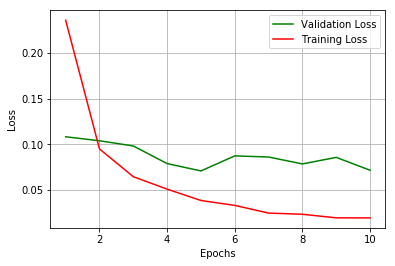

In [46]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [47]:
print('Test accuracy:', score[1])


Test accuracy: 0.9813


### Model with 5 hidden layers

In [0]:
model5 = Sequential()

model5.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model5.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model5.add(Dense(96, activation='relu', kernel_initializer='random_uniform'))
model5.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))
model5.add(Dense(32, activation='relu', kernel_initializer='random_uniform'))

#model2.add(BatchNormalization())
#model2.add(Dropout(0.5))

model5.add(Dense(output_dim, activation='softmax'))

print(model5.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_37 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_38 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_39 (Dense)             (None, 64)                6208      
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_41 (Dense)             (None, 10)                330       
Total params: 353,462
Trainable params: 353,462
Non-trainable params: 0
_________________________________________________________________
None

In [0]:
model5.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [0]:
# Training the model
history = model5.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 30, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [0]:
score = model5.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 61us/step


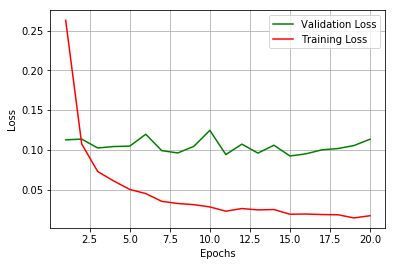

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [0]:
print('Test accuracy:', score[1])


Test accuracy: 0.9804


### Model with 5 hidden layers along with BN and Dropout

In [0]:
model6 = Sequential()

model6.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model6.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model6.add(Dense(96, activation='relu', kernel_initializer='random_uniform'))
model6.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))
model6.add(Dense(32, activation='relu', kernel_initializer='random_uniform'))

model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(output_dim, activation='softmax'))

print(model6.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_49 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_50 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_51 (Dense)             (None, 64)                6208      
_________________________________________________________________
dense_52 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_6 (Batch (None, 32)                128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
__________

In [0]:
model6.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [0]:
# Training the model
history = model6.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 30, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [0]:
score = model6.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 83us/step


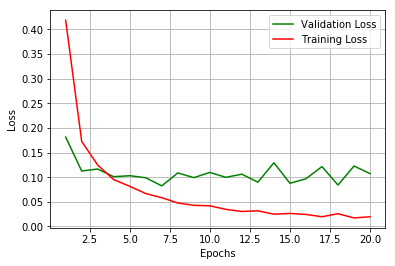

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [0]:
print('Test accuracy:', score[1])


Test accuracy: 0.9814


### Changing Dropout to 0.8

In [48]:
model6 = Sequential()

model6.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model6.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model6.add(Dense(96, activation='relu', kernel_initializer='random_uniform'))
model6.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))
model6.add(Dense(32, activation='relu', kernel_initializer='random_uniform'))

model6.add(BatchNormalization())
model6.add(Dropout(0.8))

model6.add(Dense(output_dim, activation='softmax'))

print(model6.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_20 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                6208      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_6 (Batch (None, 32)                128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
__________

In [0]:
model6.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [50]:
# Training the model
history = model6.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [51]:
score = model6.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 56us/step


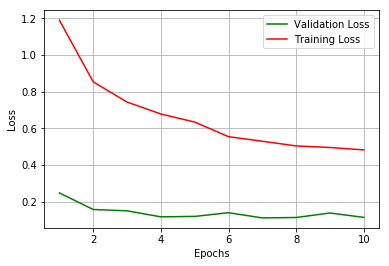

In [52]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [53]:
print('Test accuracy:', score[1])


Test accuracy: 0.9774


### Changing dropout to 0.2

In [54]:
model6 = Sequential()

model6.add(Dense(364, activation='relu', input_shape=(input_dim,),kernel_initializer='random_uniform'))
model6.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model6.add(Dense(96, activation='relu', kernel_initializer='random_uniform'))
model6.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))
model6.add(Dense(32, activation='relu', kernel_initializer='random_uniform'))

model6.add(BatchNormalization())
model6.add(Dropout(0.2))

model6.add(Dense(output_dim, activation='softmax'))

print(model6.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_25 (Dense)             (None, 128)               46720     
_________________________________________________________________
dense_26 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                6208      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32)                128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
__________

In [0]:
model6.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [57]:
# Training the model
history = model6.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose= 1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1093 - acc: 0.9702 - val_loss: 0.1149 - val_acc: 0.9673
Epoch 2/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0770 - acc: 0.9781 - val_loss: 0.0869 - val_acc: 0.9751
Epoch 3/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0563 - acc: 0.9838 - val_loss: 0.0875 - val_acc: 0.9762
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0462 - acc: 0.9865 - val_loss: 0.0839 - val_acc: 0.9766
Epoch 5/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0383 - acc: 0.9890 - val_loss: 0.0804 - val_acc: 0.9792
Epoch 6/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0338 - acc: 0.9899 - val_loss: 0.0968 - val_acc: 0.9739
Epoch 7/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0286 - acc: 0.9916 - val_loss: 0.0852 - val_acc

In [59]:
score = model6.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 65us/step


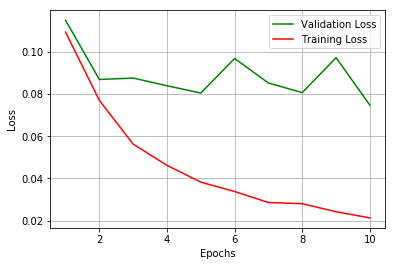

In [60]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

In [58]:
print('Test accuracy:', score[1])


Test accuracy: 0.9774


- - -

# Conclusions

In [64]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Numer of Layers", "BN","Dropout", "Accuracy"]

x.add_row(["2", 'NO',"NO", 0.86])
x.add_row(["2", 'YES',0.5, 0.98])
x.add_row(["2", 'YES',0.8, 0.98])
x.add_row(["2", 'YES',0.2, 0.98])

x.add_row(["3", 'NO',"NO", 0.87])
x.add_row(["3", 'YES',0.5, 0.98])
x.add_row(["3", 'YES',0.8, 0.97])
x.add_row(["3", 'YES',0.2, 0.98])

x.add_row(["5", 'NO','NO', 0.98])
x.add_row(["5", 'YES',0.5, 0.98])
x.add_row(["5", 'YES',0.8, 0.97])
x.add_row(["5", 'YES',0.2, 0.97])


print(x)

+-----------------+-----+---------+----------+
| Numer of Layers |  BN | Dropout | Accuracy |
+-----------------+-----+---------+----------+
|        2        |  NO |    NO   |   0.86   |
|        2        | YES |   0.5   |   0.98   |
|        2        | YES |   0.8   |   0.98   |
|        2        | YES |   0.2   |   0.98   |
|        3        |  NO |    NO   |   0.87   |
|        3        | YES |   0.5   |   0.98   |
|        3        | YES |   0.8   |   0.97   |
|        3        | YES |   0.2   |   0.98   |
|        5        |  NO |    NO   |   0.98   |
|        5        | YES |   0.5   |   0.98   |
|        5        | YES |   0.8   |   0.97   |
|        5        | YES |   0.2   |   0.97   |
+-----------------+-----+---------+----------+
